<h1>딥러닝 기초</h1>

In [ ]:
# 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# 데이터셋
from sklearn.datasets import load_diabetes
X, y_numeric = load_diabetes(return_X_y=True)
# numpy 형태로 y를 배열
y = np.array([ 0 if y_numeric[i]<140 else 1 for i in range(len(y_numeric)) ])
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.4,random_state=42)

# Scikit-learn을 이용한 인공신경망

In [ ]:
from sklearn.neural_network import MLPClassifier
f = MLPClassifier(
        hidden_layer_sizes = (10,5),
        activation = 'logistic',
        solver = 'lbfgs', # for small data set, sgd/adam for large data set
        alpha = 0.01, # L2 regularization
        batch_size = 'auto',
        learning_rate = 'constant',
        learning_rate_init = 0.001,
        random_state = 0,
        max_iter = 10000)

In [ ]:
f.fit(xtrain,ytrain)
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

1.0 0.655367231638418


# Tensorflow를 이용한 인공신경망

In [ ]:
# 텐서플로우 라이브러리
import tensorflow as tf

신경망 모델의 선언

In [ ]:

# 인공신경망 모델
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Input(shape=(10,)) )     # 입력 변수의 수 10
model.add( tf.keras.layers.Dense(10,activation='sigmoid') )
model.add( tf.keras.layers.Dense(5,activation='sigmoid') )
model.add( tf.keras.layers.Dense(2,activation='softmax'))

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

모델 훈련

In [ ]:
model.fit(xtrain,ytrain,epochs=5) # 최초 ５번

Epoch 1/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.5056 - loss: 1.0084
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5054 - loss: 0.9712
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4677 - loss: 0.9936 
Epoch 4/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5243 - loss: 0.8788 
Epoch 5/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5176 - loss: 0.8617 


In [ ]:
# Tensorflow fit method의 verbose를 조정하여 메모리를 절약할 수 있음.
model.fit(xtrain,ytrain,epochs=1000,verbose=2) # 추가 1000 번

Epoch 1/1000
9/9 - 0s - 3ms/step - accuracy: 0.5094 - loss: 0.8429
Epoch 2/1000
9/9 - 0s - 7ms/step - accuracy: 0.5094 - loss: 0.8208
Epoch 3/1000
9/9 - 0s - 4ms/step - accuracy: 0.5094 - loss: 0.8005
Epoch 4/1000
9/9 - 0s - 3ms/step - accuracy: 0.5094 - loss: 0.7835
Epoch 5/1000
9/9 - 0s - 3ms/step - accuracy: 0.5094 - loss: 0.7681
Epoch 6/1000
9/9 - 0s - 6ms/step - accuracy: 0.5094 - loss: 0.7548
Epoch 7/1000
9/9 - 0s - 3ms/step - accuracy: 0.5094 - loss: 0.7443
Epoch 8/1000
9/9 - 0s - 6ms/step - accuracy: 0.5094 - loss: 0.7358
Epoch 9/1000
9/9 - 0s - 6ms/step - accuracy: 0.5094 - loss: 0.7284
Epoch 10/1000
9/9 - 0s - 6ms/step - accuracy: 0.5094 - loss: 0.7218
Epoch 11/1000
9/9 - 0s - 4ms/step - accuracy: 0.5094 - loss: 0.7163
Epoch 12/1000
9/9 - 0s - 3ms/step - accuracy: 0.5094 - loss: 0.7120
Epoch 13/1000
9/9 - 0s - 6ms/step - accuracy: 0.5094 - loss: 0.7081
Epoch 14/1000
9/9 - 0s - 4ms/step - accuracy: 0.5094 - loss: 0.7044
Epoch 15/1000
9/9 - 0s - 3ms/step - accuracy: 0.5094 - lo

In [ ]:
model.fit(xtrain,ytrain,epochs=5)   # 추가 ５ 번

Epoch 1/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6873 - loss: 0.5357 
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6945 - loss: 0.5238 
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7429 - loss: 0.4894 
Epoch 4/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7217 - loss: 0.5080 
Epoch 5/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7275 - loss: 0.5307 


모델의 모습

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 533 (2.09 KB)

 Trainable params: 177 (708.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 356 (1.39 KB)

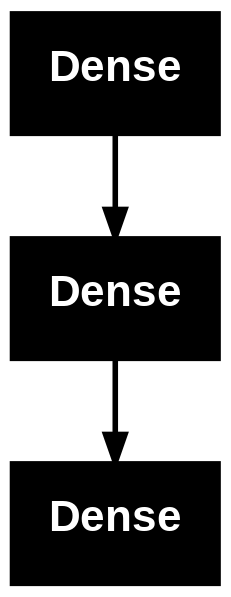

In [ ]:
tf.keras.utils.plot_model(model)

모델을 이용한 예측

In [ ]:
xtrain[0]

array([-0.01277963, -0.04464164,  0.06061839,  0.05285804,  0.04796534,
        0.02937467, -0.01762938,  0.03430886,  0.07020738,  0.00720652])

In [ ]:
model.predict(xtrain[[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


array([[0.07536848, 0.92463154]], dtype=float32)

모델 평가

In [ ]:
model.evaluate(xtrain,ytrain)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7369 - loss: 0.5062


[0.5139232873916626, 0.7283018827438354]

In [ ]:
model.evaluate(xtest,ytest)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 0.7798 - loss: 0.4540


[0.44150227308273315, 0.7966101765632629]

# 연습문제

1. 딥러닝 모델에서 첫 번째 Dense 계층(노드 수 10)와 두 번째 Dense 계층 (노드 수 5) 사이에 계층 정규화 (Layer Normalization), 두 번째 Dense 계층와 세 번째 Dense 계층 사이에 배치 정규화 (Batch Normalization)를 추가하시오. 정규화는

```
 tf.keras.layers.LayerNormalization()
 tf.keras.layers.BatchNormalization()
```
를 추가하여 구현할 수 있다. <br>
이 모델을 에폭 1,000번 반복하여 훈련하였을 때, 훈련데이터와 평가데이터의 성능은 어떻게 나타나는가? 이 모델의 학습 가능한 파라메터의 수는 모두 몇 개인가? 계층 정규화에서 추가된 파라메터는 몇 개인가? 그 이유를 설명하시오.


* 메모리가 부족한 문제가 발생할 경우, fit의 verbose를 0 또는 2로 조정하시오. (기본은 1)

In [1]:
import tensorflow as tf

# 인공신경망 모델
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Input(shape=(10,)) )  # 입력 변수의 수: 10
model.add( tf.keras.layers.Dense(10,activation='sigmoid') )
model.add( tf.keras.layers.LayerNormalization() )
model.add( tf.keras.layers.Dense(5,activation='sigmoid') )
model.add( tf.keras.layers.BatchNormalization() )
model.add( tf.keras.layers.Dense(2,activation='softmax') )

In [2]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [3]:
# 계층정규화, 배치정규화 계층에서 각각 20개, 10개의 파라메터가 추가되어 총 207개의 파라메터가 존재.
# 정규화는 입력 변수 하나에 대하여 각각의 평균과 분산을 학습하기 때문에 10개, 5개의 입력에 대해서는 총 20 + 10개의 추가 파라메터가 필요함.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization             │ (None, 10)             │            20 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 5)              │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 217 (868.00 B)

 Trainable params: 207 (828.00 B)

 Non-trainable params: 10 (40.00 B)

In [ ]:
model.fit(xtrain,ytrain,epochs=1000,verbose=2)

Epoch 1/1000
9/9 - 4s - 450ms/step - accuracy: 0.4000 - loss: 1.2450
Epoch 2/1000
9/9 - 0s - 10ms/step - accuracy: 0.4604 - loss: 1.0503
Epoch 3/1000
9/9 - 0s - 15ms/step - accuracy: 0.4830 - loss: 0.9024
Epoch 4/1000
9/9 - 0s - 9ms/step - accuracy: 0.5774 - loss: 0.7428
Epoch 5/1000
9/9 - 0s - 8ms/step - accuracy: 0.6491 - loss: 0.6535
Epoch 6/1000
9/9 - 0s - 13ms/step - accuracy: 0.6868 - loss: 0.6084
Epoch 7/1000
9/9 - 0s - 5ms/step - accuracy: 0.6906 - loss: 0.5799
Epoch 8/1000
9/9 - 0s - 5ms/step - accuracy: 0.7170 - loss: 0.5699
Epoch 9/1000
9/9 - 0s - 5ms/step - accuracy: 0.7170 - loss: 0.5533
Epoch 10/1000
9/9 - 0s - 5ms/step - accuracy: 0.7019 - loss: 0.5583
Epoch 11/1000
9/9 - 0s - 5ms/step - accuracy: 0.7019 - loss: 0.5499
Epoch 12/1000
9/9 - 0s - 7ms/step - accuracy: 0.7208 - loss: 0.5442
Epoch 13/1000
9/9 - 0s - 6ms/step - accuracy: 0.7057 - loss: 0.5357
Epoch 14/1000
9/9 - 0s - 5ms/step - accuracy: 0.6830 - loss: 0.5458
Epoch 15/1000
9/9 - 0s - 6ms/step - accuracy: 0.7132

In [ ]:
model.evaluate(xtrain,ytrain)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7560 - loss: 0.4717 


[0.4762566089630127, 0.7547169923782349]

In [ ]:
model.evaluate(xtest,ytest)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7970 - loss: 0.4402 


[0.4664205312728882, 0.7796609997749329]

2. 아래와 같이 MNIST 데이터셋을 읽어, 숫자를 판별하는 인공신경망 모델을 텐서플로우를 이용하여 만들고 성능을 평가하시오. 모델의 구조는 자유롭게 결정하고 필요하다면 추가적인 정규화나 규제화 기법을 사용하시오. 단, 최종 출력층의 활성화 함수는 softmax함수를 이용하시오.

In [ ]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.33,random_state=1)

In [ ]:
for i in range(10):
  print(f'{i} count : {np.sum(y==i)}')

0 count : 178
1 count : 182
2 count : 177
3 count : 183
4 count : 181
5 count : 182
6 count : 181
7 count : 179
8 count : 174
9 count : 180


In [ ]:
np.sum(y==3)

np.int64(183)

In [ ]:
# 인공신경망 모델
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Input(shape=(64,)) )
model.add( tf.keras.layers.Dense(128,activation='relu'))
model.add( tf.keras.layers.Dense(64, activation='leaky_relu'))
model.add( tf.keras.layers.LayerNormalization() )
model.add( tf.keras.layers.Dropout(0.3))
model.add( tf.keras.layers.Dense(10, activation='softmax'))


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(xtrain,ytrain, validation_split=0.2, epochs=100,verbose=2)

Epoch 1/100
31/31 - 4s - 142ms/step - accuracy: 0.1195 - loss: 2.9362 - val_accuracy: 0.1452 - val_loss: 2.3914
Epoch 2/100
31/31 - 0s - 5ms/step - accuracy: 0.1507 - loss: 2.5557 - val_accuracy: 0.2448 - val_loss: 2.0986
Epoch 3/100
31/31 - 0s - 6ms/step - accuracy: 0.2308 - loss: 2.2696 - val_accuracy: 0.3900 - val_loss: 1.8468
Epoch 4/100
31/31 - 0s - 8ms/step - accuracy: 0.2879 - loss: 1.9909 - val_accuracy: 0.5104 - val_loss: 1.6079
Epoch 5/100
31/31 - 0s - 5ms/step - accuracy: 0.3867 - loss: 1.7582 - val_accuracy: 0.6390 - val_loss: 1.3659
Epoch 6/100
31/31 - 0s - 5ms/step - accuracy: 0.4751 - loss: 1.5239 - val_accuracy: 0.7344 - val_loss: 1.1719
Epoch 7/100
31/31 - 0s - 5ms/step - accuracy: 0.5728 - loss: 1.3368 - val_accuracy: 0.7593 - val_loss: 0.9994
Epoch 8/100
31/31 - 0s - 5ms/step - accuracy: 0.6185 - loss: 1.1921 - val_accuracy: 0.7925 - val_loss: 0.8616
Epoch 9/100
31/31 - 0s - 9ms/step - accuracy: 0.7069 - loss: 0.9990 - val_accuracy: 0.8340 - val_loss: 0.7528
Epoch 10

In [ ]:
model.evaluate(xtrain,ytrain)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9952 - loss: 0.0242


[0.0377352312207222, 0.9900249242782593]

In [ ]:
model.evaluate(xtest,ytest)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9839 - loss: 0.0617


[0.07896409928798676, 0.9764309525489807]

In [ ]:
X.shape, xtest.shape

((1797, 64), (594, 64))

In [ ]:
ypred = model.predict(xtest)
print(f'평가 데이터 출력의 총 합 : {np.sum(ypred):.0f}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
평가 데이터 출력의 총 합 : 594
